In [7]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt 
%matplotlib inline
if not os.path.isdir('models'):
    os.mkdir('models')
    
print('TensorFlow verson:',tf.__version__) 
print('is using gpu',tf.test.is_gpu_available())

TensorFlow verson: 1.13.1
is using gpu False


# Data preprocessing

In [9]:
def get_three_classes(x,y):
    indices_0, _ =np.where(y==0.)
    indices_1, _ =np.where(y==1.)
    indices_2, _ =np.where(y==2.)
    
    indices=np.concatenate([indices_0,indices_1,indices_2])
    x=x[indices]
    y=y[indices]
    count=x.shape[0]
    indices=np.random.choice(range(count),count,replace=False)
    x=x[indices]
    y=y[indices]
    y=tf.keras.utils.to_categorical(y)
    return x,y
    

In [11]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.cifar10.load_data()
X_train,y_train=get_three_classes(X_train,y_train)
X_test,y_test=get_three_classes(X_test,y_test)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(15000, 32, 32, 3) (15000, 3)
(3000, 32, 32, 3) (3000, 3)


# Visualize Examples

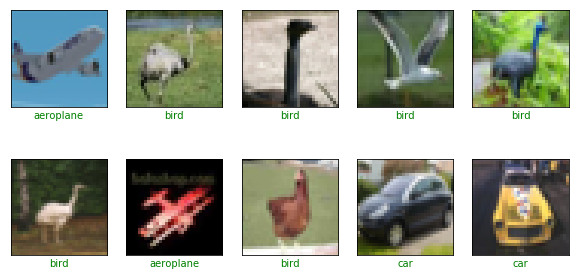

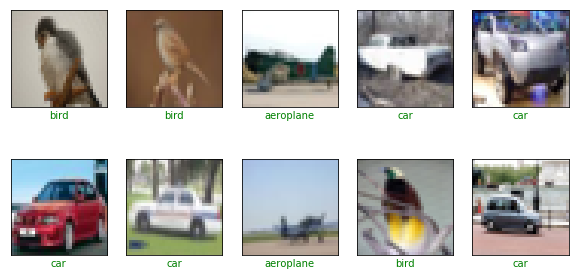

In [21]:
class_names=['aeroplane','car','bird']

def show_random_examples(x,y,p):
    indices=np.random.choice(range(x.shape[0]),10,replace=True)
    x=x[indices]
    y=y[indices]
    p=p[indices]
    plt.figure(figsize=(10,5))
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.imshow(x[i])
        plt.xticks([])
        plt.yticks([])
        col='green' if np.argmax(y[i])==np.argmax(p[i]) else 'red'
        plt.xlabel(class_names[np.argmax(p[i])],color=col)
    plt.show()
show_random_examples(X_train,y_train,y_train)
show_random_examples(X_test,y_test,y_test)        

# Creating a model

In [38]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,BatchNormalization

from tensorflow.keras.layers import Dropout,Flatten,Dense

def create_model():
    def add_conv_block(model,num_filters):
        model.add(Conv2D(num_filters,3,activation='relu',padding='same',input_shape=(32,32,3)))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=2))
        model.add(Dropout(0.5))
                  
        return model
    model=tf.keras.models.Sequential()
    
  
    
    model=add_conv_block(model,32)
    model=add_conv_block(model,64)
    model=add_conv_block(model,128)
    
    
    model.add(Flatten())
    model.add(Dense(3,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model



model=create_model()
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_v1_4 (Ba (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_v1_5 (Ba (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)          0         
__________

# Training the model

In [39]:
h=model.fit(X_train/255.,y_train,validation_data=(X_test/255.,y_test),epochs=10,batch_size=128)


Train on 15000 samples, validate on 3000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
15000/15000 [==============================] - 180s 12ms/sample - loss: 1.1432 - acc: 0.6719 - val_loss: 1.1182 - val_acc: 0.3337
Epoch 2/10
15000/15000 [==============================] - 187s 12ms/sample - loss: 0.7107 - acc: 0.7531 - val_loss: 1.0285 - val_acc: 0.3667
Epoch 3/10
15000/15000 [==============================] - 215s 14ms/sample - loss: 0.5870 - acc: 0.7805 - val_loss: 0.8135 - val_acc: 0.6243
Epoch 4/10
15000/15000 [==============================] - 227s 15ms/sample - loss: 0.5506 - acc: 0.7932 - val_loss: 0.5421 - val_acc: 0.8133
Epoch 5/10
15000/15000 [==============================] - 215s 14ms/sample - loss: 0.5087 - acc: 0.8093 - val_loss: 0.4655 - val_acc: 0.8213
Epoch 6/10
15000/15000 [==============================] - 200s 13ms/sample - loss: 0.4781 - acc: 0.8193 - val_loss: 0.4491 - val_acc: 0.8277
Epoch 7/10
15000/15000 [==============================] -

In [48]:
history_dict = h.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

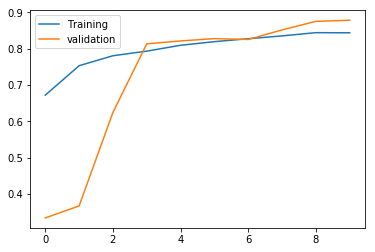

In [54]:
accuracy=h.history['acc']

val_accs=h.history['val_acc']
plt.plot(range(10),accuracy,label="Training")
plt.plot(range(10),val_accs,label="validation")
plt.legend()
plt.show()




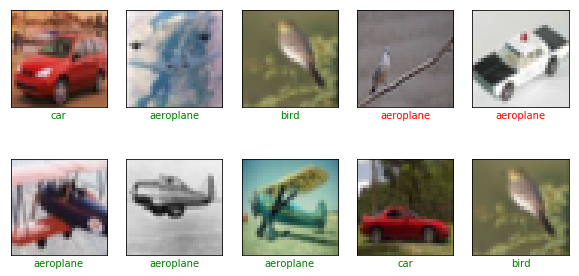

In [52]:
pred=model.predict(X_test/255.)
show_random_examples(X_test,y_test,pred)